# Predicting and Traffic of Congestion Charge Zone in Greater London Area based on Public Transport Journeys

The purpose of this research is to determine if the Public Transport Journey Types can affect the Number of Confirmed Vehicles during Charging Hours in The Congestion Charge Zone.
Multiple Machine Learning Models will be trained on 2 datasets, namely the **Public Transport Journeys by Type of Transport** and **Vehicles Entering C-Charge Zone in Greater London Area** provided by _Transport for London (TfL)_ from London Datastore.

Hypothesis: The Public Transport Journey Types can predict the Number of Confirmed Vehicles during Charging Hours in The Congestion Charge Zone.

This research will follow the KDD process of Machine Learning as follows:
1. Data Cleaning
2. Data Integration
3. Data Selection
4. Data Transformation
5. Data Mining
6. Pattern Evaluation
7. Knowledge Presentation

# Datasets

## Public Transport Journeys Type
source: https://data.london.gov.uk/dataset/public-transport-journeys-type-transport

In [1]:
import pandas as pd
publicTransport = pd.read_csv("tfl-journeys-type.csv")
publicTransport.head()


,Period and Financial year,Reporting Period,Days in period,Period beginning,Period ending,Bus journeys (m),Underground journeys (m),DLR Journeys (m),Tram Journeys (m),Overground Journeys (m),London Cable Car Journeys (m),TfL Rail Journeys (m)
0,01_10/11,1,31,01-Apr-10,01-May-10,189.1,90.5,6.3,2.3,NaN,NaN,NaN
1,02_10/11,2,28,02-May-10,29-May-10,181.6,84.5,5.8,2.2,NaN,NaN,NaN
2,03_10/11,3,28,30-May-10,26-Jun-10,175.9,84.3,5.8,2.1,NaN,NaN,NaN
3,04_10/11,4,28,27-Jun-10,24-Jul-10,183.4,86.5,6.1,2.1,NaN,NaN,NaN
4,05_10/11,5,28,25-Jul-10,21-Aug-10,160.4,82.9,5.8,2.0,NaN,NaN,NaN


## Vehicles Entering C-Charge Zone in Greater London Area
source :https://data.london.gov.uk/dataset/vehicles-entering-c-charge-zone-month

In [2]:
import pandas as pd
traffic = pd.read_csv('tfl-vehicles-c-charge-zone.csv')
traffic.head()

,Month,CC Camera Captures during Charging Hours,CC Confirmed Vehicles observed during Charging Hours,Number of Charging Day in Month,Notes
0,Jul-10,5615063,NaN,22,NaN
1,Aug-10,5174428,NaN,21,30 Aug Non Charging Day
2,Sep-10,6198427,NaN,22,NaN
3,Oct-10,6001932,NaN,21,NaN
4,Nov-10,6430184,NaN,22,NaN


# Data Cleaning

Data Cleaning is performed to filter unwanted data, handling missing data, and prepare the data for traininng ML models.

Drop rows before July 2010 of publicTransport dataset, as the traffic dataset only has data from July 2010 onwards.


In [55]:
publicTransport_clean = publicTransport.drop([0,1,2])
publicTransport_clean = publicTransport_clean.reset_index().drop(columns=['index'])
publicTransport_clean.head()


,Period and Financial year,Reporting Period,Days in period,Period beginning,Period ending,Bus journeys (m),Underground journeys (m),DLR Journeys (m),Tram Journeys (m),Overground Journeys (m),London Cable Car Journeys (m),TfL Rail Journeys (m)
0,04_10/11,4,28,27-Jun-10,24-Jul-10,183.4,86.5,6.1,2.1,NaN,NaN,NaN
1,05_10/11,5,28,25-Jul-10,21-Aug-10,160.4,82.9,5.8,2.0,NaN,NaN,NaN
2,06_10/11,6,28,22-Aug-10,18-Sep-10,175.8,80.9,5.5,2.0,NaN,NaN,NaN
3,07_10/11,7,28,19-Sep-10,16-Oct-10,189.8,88.7,6.3,2.3,NaN,NaN,NaN
4,08_10/11,8,28,17-Oct-10,13-Nov-10,179.9,90.3,6.7,2.2,5.6,NaN,NaN


In [4]:
publicTransport = publicTransport.fillna(0)
publicTransport.head()

,Period and Financial year,Reporting Period,Days in period,Period beginning,Period ending,Bus journeys (m),Underground journeys (m),DLR Journeys (m),Tram Journeys (m),Overground Journeys (m),London Cable Car Journeys (m),TfL Rail Journeys (m)
0,04_10/11,4,28,27-Jun-10,24-Jul-10,183.4,86.5,6.1,2.1,0.0,0.0,0.0
1,05_10/11,5,28,25-Jul-10,21-Aug-10,160.4,82.9,5.8,2.0,0.0,0.0,0.0
2,06_10/11,6,28,22-Aug-10,18-Sep-10,175.8,80.9,5.5,2.0,0.0,0.0,0.0
3,07_10/11,7,28,19-Sep-10,16-Oct-10,189.8,88.7,6.3,2.3,0.0,0.0,0.0
4,08_10/11,8,28,17-Oct-10,13-Nov-10,179.9,90.3,6.7,2.2,5.6,0.0,0.0


In [5]:
tflJourneys = pd.DataFrame(columns=['Month', 'Bus journeys (m)','Underground journeys (m)','DLR Journeys (m)','Tram Journeys (m)','Overground Journeys (m)','London Cable Car Journeys (m)','TfL Rail Journeys (m)'])
tflJourneys.head()

,Month,Bus journeys (m),Underground journeys (m),DLR Journeys (m),Tram Journeys (m),Overground Journeys (m),London Cable Car Journeys (m),TfL Rail Journeys (m)


In [6]:

for index, row in publicTransport_clean.iterrows():
    if(row['Period beginning'][3:6] != row['Period ending'][3:6]) :
        if(row['Period ending'][3:6] == publicTransport_clean.iloc[min(index+1, len(publicTransport_clean)-1)]['Period beginning'][3:6]):
            bus = (row['Bus journeys (m)'] + publicTransport_clean.iloc[min(index+1, len(publicTransport_clean)-1)]['Bus journeys (m)'])/2
            underground = (row['Underground journeys (m)'] + publicTransport_clean.iloc[min(index+1, len(publicTransport_clean)-1)]['Underground journeys (m)'])/2
            DLR = (row['DLR Journeys (m)'] + publicTransport_clean.iloc[min(index+1, len(publicTransport_clean)-1)]['DLR Journeys (m)'])/2
            tram = (row['Tram Journeys (m)'] + publicTransport_clean.iloc[min(index+1, len(publicTransport_clean)-1)]['Tram Journeys (m)'])/2
            overground = (row['Overground Journeys (m)'] + publicTransport_clean.iloc[min(index+1, len(publicTransport_clean)-1)]['Overground Journeys (m)'])/2
            cable = (row['London Cable Car Journeys (m)'] + publicTransport_clean.iloc[min(index+1, len(publicTransport_clean)-1)]['London Cable Car Journeys (m)'])/2
            rail = (row['TfL Rail Journeys (m)'] + publicTransport_clean.iloc[min(index+1, len(publicTransport_clean)-1)]['TfL Rail Journeys (m)'])/2


            tflJourneys.loc[index] = ({'Month' : row['Period ending'][3:10] , 'Bus journeys (m)': bus, 'Underground journeys (m)' : underground, 'DLR Journeys (m)' : DLR, 'Tram Journeys (m)': tram, 'Overground Journeys (m)': overground, 'London Cable Car Journeys (m)': cable, 'TfL Rail Journeys (m)': rail})


In [7]:
tflJourneys

,Month,Bus journeys (m),Underground journeys (m),DLR Journeys (m),Tram Journeys (m),Overground Journeys (m),London Cable Car Journeys (m),TfL Rail Journeys (m)
0,Jul-10,171.90,84.70,5.95,2.05,0.00,0.00,0.00
1,Aug-10,168.10,81.90,5.65,2.00,0.00,0.00,0.00
2,Sep-10,182.80,84.80,5.90,2.15,0.00,0.00,0.00
3,Oct-10,184.85,89.50,6.50,2.25,2.80,0.00,0.00
4,Nov-10,179.35,90.45,6.55,2.25,5.50,0.00,0.00
...,...,...,...,...,...,...,...,...
164,Mar-23,141.90,87.35,7.70,1.65,13.30,0.10,14.00
167,May-23,145.90,89.20,7.80,1.65,14.35,0.10,15.55
168,Jun-23,146.45,92.15,7.90,1.65,14.45,0.10,16.35
169,Jul-23,138.40,90.35,7.55,1.50,13.35,0.15,16.05


In [8]:
idx = tflJourneys.loc[tflJourneys['Month']=='Oct-16'].index
tflJourneys = tflJourneys.loc[idx[0]:]
tflJourneys.reset_index(drop=True, inplace=True)
tflJourneys


,Month,Bus journeys (m),Underground journeys (m),DLR Journeys (m),Tram Journeys (m),Overground Journeys (m),London Cable Car Journeys (m),TfL Rail Journeys (m)
0,Oct-16,181.75,111.50,9.85,2.35,15.30,0.10,3.75
1,Nov-16,179.65,114.65,10.10,2.15,15.55,0.10,3.90
2,Dec-16,164.25,102.85,8.85,2.10,13.85,0.10,3.65
3,Jan-17,160.10,95.45,8.60,2.25,13.40,0.10,3.55
4,Feb-17,173.65,105.10,9.65,2.30,14.70,0.10,3.70
...,...,...,...,...,...,...,...,...
69,Mar-23,141.90,87.35,7.70,1.65,13.30,0.10,14.00
70,May-23,145.90,89.20,7.80,1.65,14.35,0.10,15.55
71,Jun-23,146.45,92.15,7.90,1.65,14.45,0.10,16.35
72,Jul-23,138.40,90.35,7.55,1.50,13.35,0.15,16.05


In [9]:

traffic.dropna(subset=['CC Confirmed Vehicles observed during Charging Hours'], inplace=True)

numVehicles = traffic.loc[:,['Month','CC Confirmed Vehicles observed during Charging Hours']]
numVehicles.reset_index(drop=True, inplace=True)
numVehicles 


,Month,CC Confirmed Vehicles observed during Charging Hours
0,Oct-16,2283444.0
1,Nov-16,2396023.0
2,Dec-16,1794886.0
3,Jan-17,2119813.0
4,Feb-17,2049863.0
...,...,...
79,May-23,2308362.0
80,Jun-23,2443181.0
81,Jul-23,2316631.0
82,Aug-23,2277610.0


# Data Integration

Joining the datasets for presentation and convenience.

In [10]:
df = tflJourneys.join(numVehicles.set_index('Month'), on='Month')
df = df.set_index('Month')
df

,Bus journeys (m),Underground journeys (m),DLR Journeys (m),Tram Journeys (m),Overground Journeys (m),London Cable Car Journeys (m),TfL Rail Journeys (m),CC Confirmed Vehicles observed during Charging Hours
Month,,,,,,,,
Oct-16,181.75,111.50,9.85,2.35,15.30,0.10,3.75,2283444.0
Nov-16,179.65,114.65,10.10,2.15,15.55,0.10,3.90,2396023.0
Dec-16,164.25,102.85,8.85,2.10,13.85,0.10,3.65,1794886.0
Jan-17,160.10,95.45,8.60,2.25,13.40,0.10,3.55,2119813.0
Feb-17,173.65,105.10,9.65,2.30,14.70,0.10,3.70,2049863.0
...,...,...,...,...,...,...,...,...
Mar-23,141.90,87.35,7.70,1.65,13.30,0.10,14.00,2377372.0
May-23,145.90,89.20,7.80,1.65,14.35,0.10,15.55,2308362.0
Jun-23,146.45,92.15,7.90,1.65,14.45,0.10,16.35,2443181.0


# Data Exploration

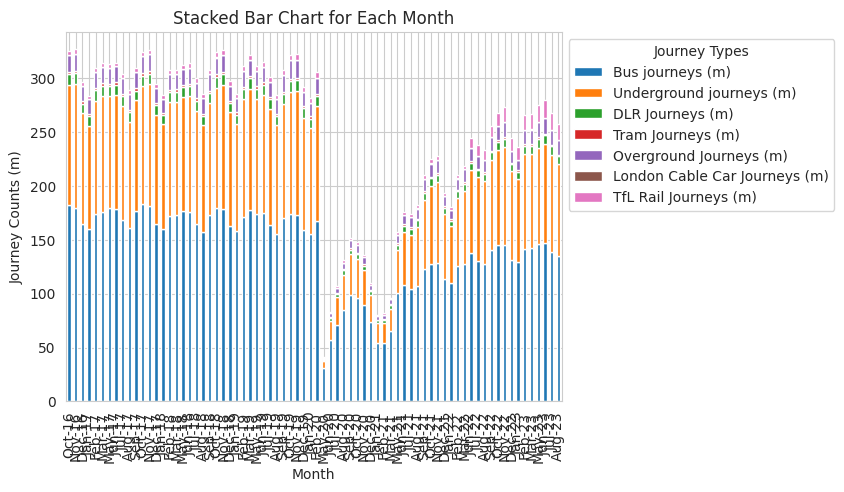

In [42]:
import matplotlib.pyplot as plt

df.iloc[:,:-1].plot(kind='bar', stacked=True)

plt.title('Stacked Bar Chart for Each Month')
plt.xlabel('Month')
plt.ylabel('Journey Counts (m)')
plt.legend(title='Journey Types', bbox_to_anchor=(1, 1))
plt.show()

Based on the bar chart, the Total Journey (m) before COVID-19 was averaged higher, and the public transport is still recovering from the pandemic in a steady rise.

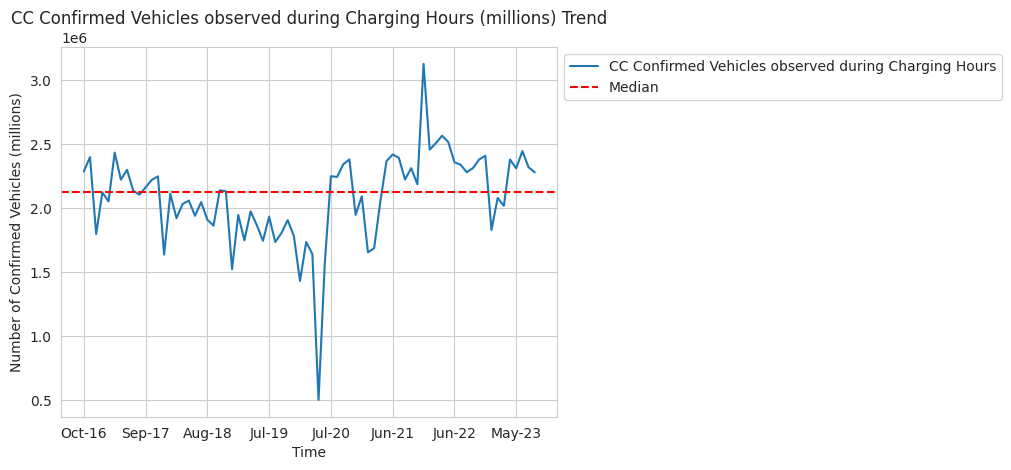

In [51]:
import matplotlib.pyplot as plt

median_value = df.iloc[:,-1].median()

df.iloc[:,-1].plot(kind='line')

# Add median line
plt.axhline(y=median_value, color='red', linestyle='--', label='Median')

plt.title('CC Confirmed Vehicles observed during Charging Hours (millions) Trend')
plt.xlabel('Time')
plt.ylabel('Number of Confirmed Vehicles (millions)')
plt.legend(bbox_to_anchor=(1, 1))  # Add a legend to display the median line label
plt.show()


Number of Confirmed Vehicles were on a downward trend before COVID-19, and went on an upward trend after the pandemic, but recessed back to the proximity of the median.

# Data Selection

X is a variable for all the faetures (all columns except for the last column), and y is a variable for the target column 'CC Confirmed Vehicles observed during Charging Hours'.

In [12]:
X = df.iloc[:,:-1]
y = df['CC Confirmed Vehicles observed during Charging Hours']

X.shape, y.shape

((74, 7), (74,))

Perform train-test split for training ML models.

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((44, 7), (30, 7), (44,), (30,))

## Feature Scaling

Using StandardScaler to scale features to ensure _equal contribution of features_ and _improved convergence_.

In [14]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Feature Selection

Least Absolute Shrinkage and Selection Operator (LASSO) was used to identify the importance of the features.

The result showed that all columns were significant.

In [15]:
from sklearn.linear_model import Lasso


lasso_model = Lasso(alpha=0.1, max_iter=2000, tol=0.001) 

lasso_model.fit(X_train, y_train)

X_train_lasso = X_train[:, lasso_model.coef_ != 0]
X_test_lasso = X_test[:, lasso_model.coef_ != 0]

selected_features_lasso = [feature for feature, coef in zip(X.columns, lasso_model.coef_) if coef != 0]
selected_features_lasso

['Bus journeys (m)',
 'Underground journeys (m)',
 'DLR Journeys (m)',
 'Tram Journeys (m)',
 'Overground Journeys (m)',
 'London Cable Car Journeys (m)',
 'TfL Rail Journeys (m)']

In [16]:
X_train = X_train_lasso
X_test = X_test_lasso

# Data Mining

Training each ML model with training data, then testing the models with testing data to evaluate the models based on R-squared score.

## Supervised Learning

### Support Vector Machine Regressor (SVR)

SVM is applied to the dataset initially for experimentation. However, SVM did not perform well even with the kernel trick.

In [17]:
from sklearn.svm import SVR
svr = SVR(kernel = 'linear')
svr.fit(X_train, y_train)
svr.score(X_test, y_test)

-0.0041227003237997994

In [18]:
from sklearn.svm import SVR
svr = SVR(kernel = 'poly')
svr.fit(X_train, y_train)
svr.score(X_test, y_test)

-0.004034794641277761

In [19]:
from sklearn.svm import SVR
svr = SVR(kernel = 'sigmoid')
svr.fit(X_train, y_train)
svr.score(X_test, y_test)

-0.004148040895689986

In [20]:
from sklearn.svm import SVR
svr = SVR(kernel = 'rbf')
svr.fit(X_train, y_train)
svr.score(X_test, y_test)

-0.004140318857831504

### Decision Tree

A Decision Tree performs significantly better on this dataset.

In [21]:
from sklearn.tree import DecisionTreeRegressor
regressionTree = DecisionTreeRegressor(random_state=42)
regressionTree.fit(X_train, y_train)
regressionTree.score(X_test, y_test)

0.5143893633247387

## Ensemble Learning

Experimenting with different Ensemble methods to increase accuracy.

### Boosting with AdaBoost

In [22]:
from  sklearn.ensemble import AdaBoostRegressor
adaBoost = AdaBoostRegressor(random_state=42)
adaBoost.fit(X_train, y_train)
adaBoost.score(X_test, y_test)

0.519513099455184

### Boosting with GradientBoostingRegressor

In [23]:
from  sklearn.ensemble import GradientBoostingRegressor
gradientBoost = GradientBoostingRegressor(random_state=42)
gradientBoost.fit(X_train, y_train)
gradientBoost.score(X_test, y_test)

0.5701629126969854

### Bagging with Random Forest

In [24]:
from  sklearn.ensemble import RandomForestRegressor
randomForest = RandomForestRegressor(random_state=42, n_estimators=70)
randomForest.fit(X_train, y_train)
randomForest.score(X_test, y_test)

0.5797103148670031

### Bagging with BaggingRegressor

In [25]:
from  sklearn.ensemble import BaggingRegressor
baggingReg = BaggingRegressor(random_state=42, n_estimators=30)
baggingReg.fit(X_train, y_train)
baggingReg.score(X_test, y_test)

0.6123098097409143

Based on the R-squared score of each model, BaggingRegressor performed the best.

Evaluating the Regression model with 4 metrics: 
- Mean Squared Error (MSE) : Measures the average squared difference between predicted and actual values. Lower values indicate better performance.
- R-Squared : Represents the proportion of the variance in the dependent variable that is predictable from the independent variables. A score of 1.0 indicates perfect predictions.
- Adjusted R-Squared : A modified version of R-squared that accounts for the number of predictors in the model, providing a more accurate measure in the context of multiple regression.
- Coefficient of Determination (COD) : A simple measure of the proportion of variance in the dependent variable explained by the independent variable.

In [26]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import numpy as np

def adjusted_r2_score(y_test, y_pred, n, p):
    r2 = r2_score(y_test, y_pred)
    adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))
    return adjusted_r2

def cod(y_true, y_pred):
    sst = np.sum((y_true - np.mean(y_true))**2)
    ssr = np.sum((y_true - y_pred)**2)
    cod_value = 1 - (ssr / sst)
    return cod_value



y_pred = baggingReg.predict(X_test)

n_samples = len(y_test)
n_predictors = X.shape[1]  # Number of predictors in the model
adjusted_r2 = adjusted_r2_score(y_test, y_pred, n_samples, n_predictors)

cod_value = cod(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)



print("MSE: %f\nR-Squared: %f\nAdjusted R-Squared: %f\nCOD: %f"%(mse, r2, adjusted_r2, cod_value))


MSE: 42291493195.103874
R-Squared: 0.612310
Adjusted R-Squared: 0.488954
COD: 0.612310


# Pattern Evaluation

Data lacks granularity, would be better if data is measured in weeks.
Outliers not handles, as this topic is not within the scope of the project.

# Knowledge Presentation

Actual vs. Predicted Values Graph:

This graph compares the actual observed values (response variable) with the predicted values generated by the regression model.

Ideally, the points should form a diagonal line, indicating that the predicted values closely match the actual values. Deviations from the diagonal suggest discrepancies between the model predictions and the true outcomes.

In this case, the trend of the plotted values are not exactly aligned with the diagonal. An outlier can be observed 

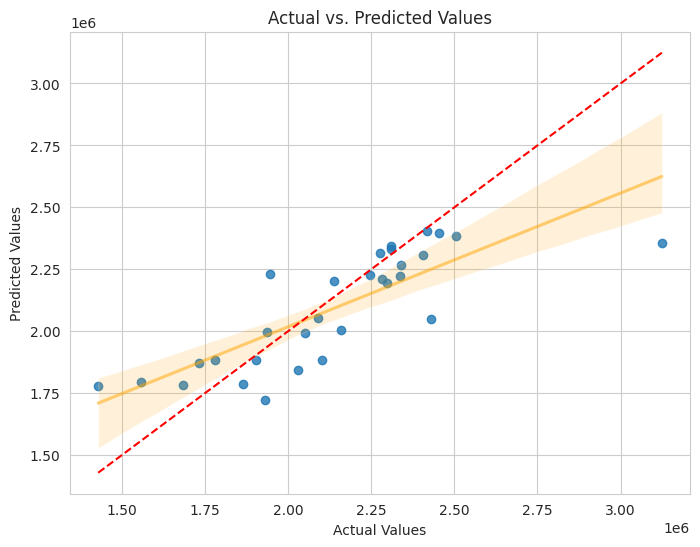

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')

y_pred = baggingReg.predict(X_test)

# Scatter plot of actual vs predicted values with Seaborn
plt.figure(figsize=(8, 6))
sns.regplot(x=y_test, y=y_pred, line_kws={'color': 'orange', 'alpha': 0.5})

# Add a dashed diagonal line
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()


Histogram of Residuals:

The histogram of residuals provides a visual representation of the distribution of the differences between the actual and predicted values, known as residuals.

A normal distribution of residuals is often desirable, suggesting that the model's errors are approximately normally distributed. Skewness or outliers in the histogram may indicate issues with the model assumptions.

In this case, there is an outlier with the data, so the distribution is slightly skewed.

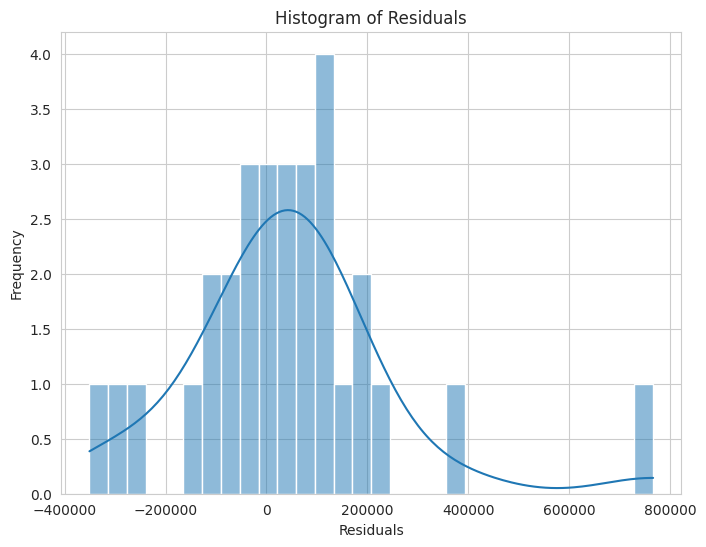

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

y_pred = baggingReg.predict(X_test)
# Calculate residuals
residuals = y_test - y_pred

# Plot histogram of residuals
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, bins=30)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()


Residual vs. Fitted Values Graph:

This graph assesses the relationship between the residuals (the differences between actual and predicted values) and the fitted values (the predicted values themselves).

The plot helps identify patterns or trends in the residuals. A horizontal band of points around zero suggests homoscedasticity (constant variance of residuals). Patterns or trends may indicate issues such as heteroscedasticity (varying variance) or nonlinearity in the model.

In this case, the residuals show no patterns or trends.

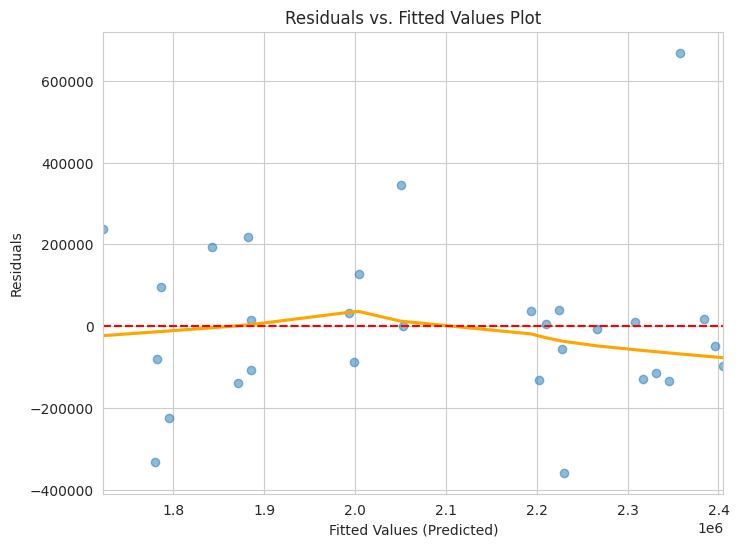

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')

y_pred = baggingReg.predict(X_test)
# Calculate residuals
residuals = y_test - y_pred

# Create Residuals vs. Fitted Values plot with Seaborn
plt.figure(figsize=(8, 6))
sns.residplot(x=y_pred, y=residuals, scatter_kws={'alpha': 0.5}, line_kws={'color': 'orange'}, lowess=True)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Fitted Values (Predicted)')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values Plot')
plt.show()


